In [1]:
#Importing the required libraries

import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as mpl

In [2]:
# Loading the dataset

data = pd.read_csv('C:\\Users\\shiva\\.spyder-py3\\NN-data2.csv')

In [3]:
#Removing un-necessary columns

data=data.drop(['Unnamed: 0'], axis=1)

In [4]:
#looking at the data

data

,Comp,Day,Venue,GF,GA,Result
0,1,6,1,5,1,1
1,1,7,2,1,0,1
2,1,6,1,4,1,1
3,2,2,2,1,2,0
4,1,7,2,2,1,1
...,...,...,...,...,...,...
940,2,3,2,1,2,0
941,1,6,2,2,0,1
942,1,6,1,0,1,0
943,1,7,2,1,2,0


In [5]:
#Checking the data types

data.dtypes

Comp      int64
Day       int64
Venue     int64
GF        int64
GA        int64
Result    int64
dtype: object

In [6]:
# Split the data into training and testing sets, while seperating feature variables and the target variable

train_data = data.sample(frac=0.90)
test_data = data.drop(train_data.index)

train_X = train_data.drop(['Result'], axis=1)
train_Y = train_data['Result']
test_X = test_data.drop(['Result'], axis=1)
test_Y = test_data['Result']

In [7]:
#Training Features

train_X

,Comp,Day,Venue,GF,GA
151,1,7,1,2,1
551,1,7,2,0,2
521,1,2,1,3,1
682,2,3,1,3,1
536,2,3,1,4,1
...,...,...,...,...,...
12,1,6,1,0,2
253,1,6,2,1,2
722,1,6,1,3,0
458,5,7,3,1,3


In [8]:
#Training Labels

train_Y

151    1
551    0
521    1
682    1
536    1
      ..
12     0
253    0
722    1
458    0
634    1
Name: Result, Length: 850, dtype: int64

In [9]:
#Testing Features

test_X

,Comp,Day,Venue,GF,GA
6,1,6,1,0,1
18,1,4,1,3,1
32,1,1,1,3,0
35,1,7,1,1,2
41,3,4,1,0,1
...,...,...,...,...,...
900,1,6,2,1,0
905,1,7,1,2,0
912,1,6,2,3,0
916,1,6,1,5,0


In [10]:
#Testing Labels

test_Y

6      0
18     1
32     1
35     0
41     0
      ..
900    1
905    1
912    1
916    1
934    1
Name: Result, Length: 95, dtype: int64

In [11]:
#Code to save testing and training sets as CSV - commented out since this block of code only needs to be run ONCE.

#train_X.to_csv('Sample_Train_Data_NN.csv', index=False)
#test_X.to_csv('Sample_Test_Data_NN.csv', index=False)

In [14]:
# Defining  the neural network model, with input, hidden and output layers using Keras.

model = Sequential()
model.add(Dense(5, input_dim=5, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='relu'))

# Compiling the model

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the model

model.fit(train_X, train_Y, epochs=40, batch_size=10)

Epoch 1/40
85/85 [==============================] - 2s 4ms/step - loss: 1.9775 - accuracy: 0.2400
Epoch 2/40
85/85 [==============================] - 0s 4ms/step - loss: 1.1856 - accuracy: 0.2859
Epoch 3/40
85/85 [==============================] - 0s 4ms/step - loss: 0.8073 - accuracy: 0.4847
Epoch 4/40
85/85 [==============================] - 0s 4ms/step - loss: 0.7416 - accuracy: 0.7200
Epoch 5/40
85/85 [==============================] - 0s 4ms/step - loss: 0.6878 - accuracy: 0.7400
Epoch 6/40
85/85 [==============================] - 0s 4ms/step - loss: 0.6828 - accuracy: 0.7424
Epoch 7/40
85/85 [==============================] - 0s 4ms/step - loss: 0.6774 - accuracy: 0.7482
Epoch 8/40
85/85 [==============================] - 0s 4ms/step - loss: 0.6135 - accuracy: 0.7529
Epoch 9/40
85/85 [==============================] - 0s 5ms/step - loss: 0.6116 - accuracy: 0.7565
Epoch 10/40
85/85 [==============================] - 0s 4ms/step - loss: 0.6352 - accuracy: 0.7553
Epoch 11/40
85/85 [

In [15]:
# Evaluating  the model on the test set

scores = model.evaluate(test_X, test_Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

3/3 [==============================] - 1s 5ms/step - loss: 0.4205 - accuracy: 0.8526

accuracy: 85.26%


In [16]:
# Calculating the confusion matrix

y_pred = model.predict(test_X)
y_pred = [1 if x >= 0.5 else 0 for x in y_pred]
cm = confusion_matrix(test_Y, y_pred)
print(cm)

3/3 [==============================] - 0s 6ms/step
[[21  3]
 [11 60]]


In [17]:
#Looking at the loss of the neural network across the 40 Epocs

history = model.fit(train_X, train_Y, epochs=40, batch_size=10, validation_data=(test_X, test_Y))

Epoch 1/40
85/85 [==============================] - 1s 6ms/step - loss: 0.2772 - accuracy: 0.9129 - val_loss: 0.3477 - val_accuracy: 0.9684
Epoch 2/40
85/85 [==============================] - 0s 5ms/step - loss: 0.2815 - accuracy: 0.9682 - val_loss: 0.3142 - val_accuracy: 0.9579
Epoch 3/40
85/85 [==============================] - 0s 5ms/step - loss: 0.2719 - accuracy: 0.9647 - val_loss: 0.2961 - val_accuracy: 0.9579
Epoch 4/40
85/85 [==============================] - 0s 5ms/step - loss: 0.2267 - accuracy: 0.9729 - val_loss: 0.2811 - val_accuracy: 0.9684
Epoch 5/40
85/85 [==============================] - 0s 5ms/step - loss: 0.2090 - accuracy: 0.9741 - val_loss: 0.2673 - val_accuracy: 0.9684
Epoch 6/40
85/85 [==============================] - 0s 5ms/step - loss: 0.1643 - accuracy: 0.9729 - val_loss: 0.2570 - val_accuracy: 0.9789
Epoch 7/40
85/85 [==============================] - 0s 5ms/step - loss: 0.1584 - accuracy: 0.9800 - val_loss: 0.2484 - val_accuracy: 0.9789
Epoch 8/40
85/85 [==

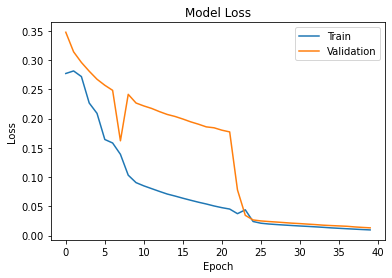

In [18]:
# Plotting the training and validation loss for each epoch

mpl.plot(history.history['loss'])
mpl.plot(history.history['val_loss'])
mpl.title('Model Loss')
mpl.ylabel('Loss')
mpl.xlabel('Epoch')
mpl.legend(['Train', 'Validation'], loc='upper right')
mpl.show()